# Prediksi Perubahan Gaji di Surabaya dan Gresik Tahun 2024-2025

In [131]:
# Pendefinisian fungsi dan kelas yang digunakan

In [132]:
# Import library keras dan lain-lain
import numpy as np # For matrix math
from numpy import loadtxt
from keras.models import Sequential
import matplotlib.pyplot as plt # For plotting
import keras
from keras.utils import to_categorical
from keras.layers import Flatten, Dense, Activation
from IPython.display import clear_output

# Normalisasi Data

![normasilisasi_data](normalisasi.jpg)


In [133]:
def normalisasi(x):
    a = np.max(x)
    b = np.min(x)
    for i in x:
        hasil_normalisasi = (0.8 * (x - b))/(a-b) + 0.1
    return hasil_normalisasi

In [134]:
# load the data latih
# Data Tingkat Pengangguran Terbuka (UMR) mulai Tahun 2015
# sampai dengan Tahun 2023

UMR = loadtxt('data_umr.csv', delimiter=',')
UMR_normal = normalisasi(UMR)

UMR_Target = UMR[:,7]
UMR_Target_Uji = UMR[:,8]

# DATA PELATIHAN =================================

X = UMR_normal[:,0:7]

Y = UMR_normal[:,7]

# DATA UJI PREDIKSI=================================

X1 = UMR_normal[:,1:8]

# Urut tahun, menggantikan indeks dari 0 s.d 1
urut = [1, 2]


In [135]:
print(UMR)

[[2710000. 3045000. 3296220. 3583312. 3871052. 4200479. 4300479. 4375479.
  4525479.]
 [1410000. 1573000. 1702780. 3580370. 3867874. 4197030. 4297030. 4372030.
  4522030.]]


In [136]:
UMR_normal = normalisasi(UMR)
print(UMR_normal)

[[0.43381705 0.51983913 0.58434799 0.65806815 0.7319547  0.81654574
  0.84222397 0.86148265 0.9       ]
 [0.1        0.14185552 0.17518073 0.6573127  0.73113865 0.8156601
  0.84133833 0.86059701 0.89911436]]


In [137]:
baris, kolom = UMR.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 9


In [138]:
baris, kolom = UMR_normal.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 9


Masukan Jaringan X

In [139]:
baris, kolom = X.shape
print("barisnya =",baris)
print("kolomnya =",kolom)

barisnya = 2
kolomnya = 7


In [140]:
# Mendefinisikan model keras
model = Sequential()
model.add(Dense(7, input_dim=7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [141]:
# Proses kompilasi (pelatihan) Deep Learning
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [142]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show();
        
plot_losses = PlotLosses()

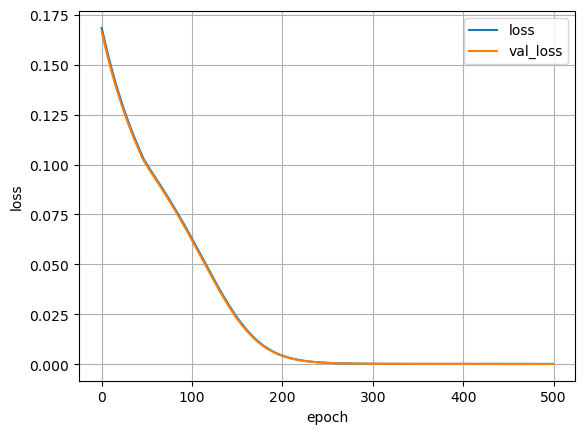

In [143]:
model.fit(X, Y,
          epochs=500,
          validation_data=(X, Y),
          callbacks=[plot_losses],
          verbose=0)

In [144]:
# evaluate the keras model
# Evalusi hasil proses pelatihan Deep Learning
# Hitung akurasi hasil pelatihan dalam bentuk Prosentase Keberhasilan
# Prosentase Keberhasilan = 100 - MAPE

#_, MAPE_pelatihan = model.evaluate(X_normal, Y_normal, batch_size=1)

_, MSE = model.evaluate(X, Y, batch_size=1)

#print('Prosentase_keberhasilan: %.2f' % (100-MAPE_pelatihan))

print('MSE : %.2f' % (MSE))


2/2 [==============================] - 0s 8ms/step - loss: 1.8492e-04 - mean_squared_error: 1.8492e-04
MSE : 0.00


In [145]:
# menjalankan fungsi prediksi
y_pred = model.predict(X)
print(y_pred)

1/1 [==============================] - 0s 129ms/step
[[0.875103  ]
 [0.84702057]]


In [146]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(UMR)
b = np.min(UMR)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_prediksi = (((y_pred - 0.1)*(a - b))/0.8) + b

print("y_prediksi =", y_prediksi)

y_prediksi = [[4428521. ]
 [4319158.5]]


In [147]:
# Urut tahun, menggantikan indeks dari 0 s.d 1
urutan1 = ['2024',
       '2025'
       ]

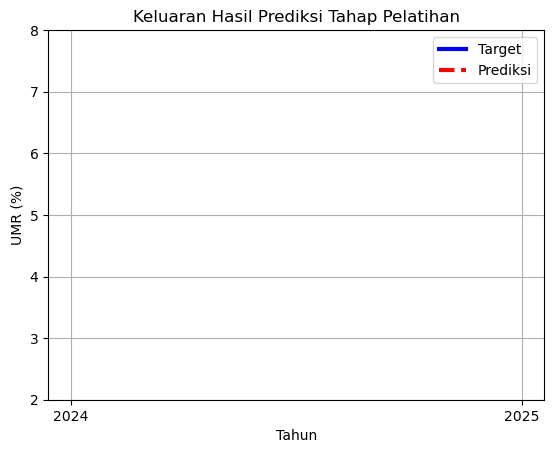

In [148]:
# Plot Keluaran Hasil Prediksi Tahap Pelatihan

plt.title('Keluaran Hasil Prediksi Tahap Pelatihan')
plt.plot(urutan1, UMR_Target, '-b', label='Target',linewidth=3, markersize=12)
plt.plot(urutan1, y_prediksi, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend()
plt.xlabel('Tahun')
plt.ylabel('UMR (%)')
plt.ylim((2,8))
plt.grid()

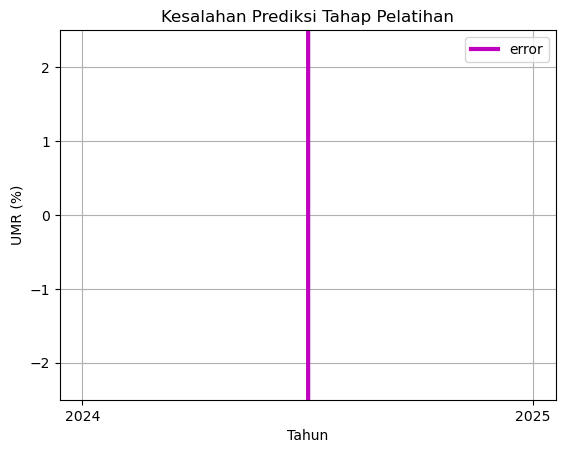

In [149]:
# Plot Kesalahan Prediksi

selisih = UMR_Target - y_prediksi.transpose()
plt.title('Kesalahan Prediksi Tahap Pelatihan')
plt.plot(urutan1, selisih.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend()
plt.xlabel('Tahun')
plt.ylabel('UMR (%)')
plt.ylim((-2.5,2.5))
plt.grid()

In [150]:
# Pengukuran kinerja Deep Learning

from sklearn.metrics import mean_squared_error
from math import sqrt
mse  = mean_squared_error(UMR_Target, y_prediksi)
rmse = sqrt(mse)
print("mse =",mse)
print("rmse =",rmse)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(UMR_Target, y_prediksi)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)

mse = 2804424638.125
rmse = 52956.81861786072
MAPE = 1.2502132550129985
Persentase_keberhasilan = 98.749786744987


# Prediksi UMR
# Tahap Pengujian

Untuk Memprediksi UMR di Tahun 2024 dan 2025

In [151]:
# Urut tahun, menggantikan indeks dari 0 s.d 1
urutan2 = ['2024', '2025']

In [152]:
# Ujicoba prediksi
y_uji = model.predict(X1)
print('Hasil prediksi sebelum denormalisasi =', y_uji)

1/1 [==============================] - 0s 33ms/step
Hasil prediksi sebelum denormalisasi = [[0.8838194]
 [0.8847531]]


In [153]:
# Denormalisasi Data sebelum dibandngkan

a = np.max(UMR)
b = np.min(UMR)

# Rumus
# x_denormalisasi = (((x_normalisasi - 0.1)*(a - b))/0.8) + b

y_pengujian = (((y_uji - 0.1)*(a - b))/0.8) + b

print("y_pengujian =", y_pengujian)

y_pengujian = [[4462466.]
 [4466102.]]


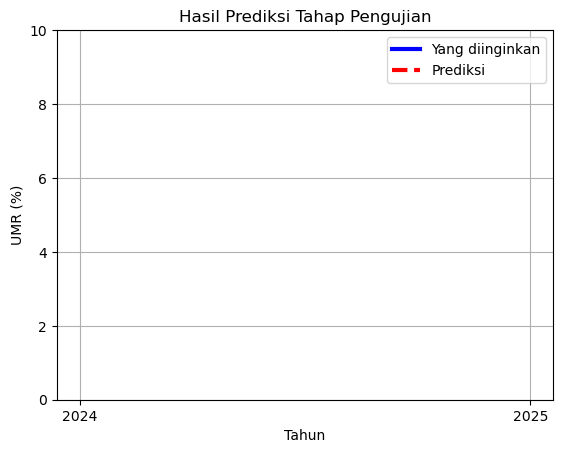

In [154]:
# Plot keluaran hasil prediksi Tahap Pengujian

plt.title('Hasil Prediksi Tahap Pengujian')
plt.plot(urutan2,  UMR_Target_Uji, '-b', label='Yang diinginkan',linewidth=3, markersize=12)
plt.plot(urutan2, y_pengujian, '--r', label='Prediksi', linewidth=3, markersize=12)
plt.legend()
plt.xlabel('Tahun')
plt.ylabel('UMR (%)')
plt.ylim((0,10))
plt.grid()

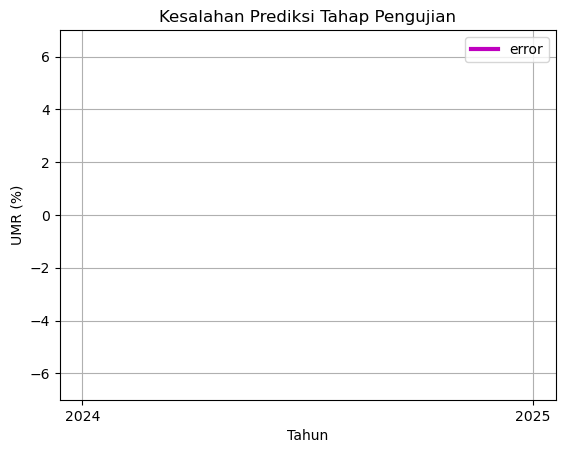

In [155]:
# Plot kesalahan prediksi Tahap Pengujian

selisih_pengujian = UMR_Target_Uji - y_pengujian.transpose()
plt.title('Kesalahan Prediksi Tahap Pengujian')
plt.plot(urutan2, selisih_pengujian.transpose(), '-m', label='error', linewidth=3, markersize=12)
plt.legend()
plt.xlabel('Tahun')
plt.ylabel('UMR (%)')
plt.ylim((-7,7))
plt.grid()

In [156]:
# Pengukuran kinerja Deep Learning Tahap Pengujian

from sklearn.metrics import mean_squared_error
from math import sqrt
mse1  = mean_squared_error(UMR_Target_Uji, y_pengujian)
rmse1 = sqrt(mse1)
print("mse =",mse1)
print("rmse =",rmse1)

MAPE = mean_absolute_percentage_error(UMR_Target_Uji, y_pengujian)
print("MAPE =",MAPE)

Persentase_keberhasilan = 100-MAPE
print("Persentase_keberhasilan =", Persentase_keberhasilan)

mse = 3549289676.5
rmse = 59575.91523845857
MAPE = 1.3146127015899114
Persentase_keberhasilan = 98.68538729841009
